<a href="https://colab.research.google.com/github/mengwangk/dl-projects/blob/master/04_09_auto_ml_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated ML - Generate Data

In [0]:
COLAB = True

DATASET_NAME = '4D.zip'

FEATURE_DATASET_PREFIX = 'feature_matrix_snapshot'

ORIG_FEATURE_DATASET_PREFIX = 'feature_matrix_d2_v3'


In [10]:
if COLAB:
  !pip install -U featuretools
  !rm -rf dl-projects
  !git clone https://github.com/mengwangk/dl-projects
  !cd dl-projects && ls
else:
  !pip install -U featuretools

Requirement already up-to-date: featuretools in /usr/local/lib/python3.6/dist-packages (0.13.2)
Cloning into 'dl-projects'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 1778 (delta 96), reused 31 (delta 13), pack-reused 1625
Receiving objects: 100% (1778/1778), 76.70 MiB | 27.03 MiB/s, done.
Resolving deltas: 100% (1091/1091), done.
01_01_tensor.ipynb	       04_04_auto_ml_2.ipynb  07_algebra.ipynb
01_02_correlation.ipynb        04_04_auto_ml_3.ipynb  08_probability.ipynb
01_03_preprocessing.ipynb      04_04_auto_ml_4.ipynb  09_evaluation.ipynb
01_04_numpy.ipynb	       04_05_auto_ml_0.ipynb  50_RL.ipynb
01_05_parallelization.ipynb    04_05_auto_ml_1.ipynb  999_Links.ipynb
01_06_pandas..ipynb	       04_05_auto_ml_2.ipynb  archive
01_07_python_0.ipynb	       04_06_auto_ml_1.ipynb  d01_download.ipynb
01_07_python_1.ipynb	       04_06_auto_ml_2.ipynb  d02_0_features.ipynb
01_07_pyth

In [11]:
if COLAB:
  from google.colab import drive
  drive.mount('/content/gdrive')
  GDRIVE_DATASET_FOLDER = Path('gdrive/My Drive/datasets/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
if COLAB:
  !cp dl-projects/utils* .
  !cp dl-projects/preprocess* .

In [0]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import math 
import matplotlib
import re

from scipy import stats
from collections import Counter
from pathlib import Path

plt.style.use('fivethirtyeight')

sns.set(style="ticks")

# Automated feature engineering
import featuretools as ft

# Machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from dateutil.relativedelta import relativedelta

from IPython.display import display

from utils import *
from preprocess import *

# The Answer to the Ultimate Question of Life, the Universe, and Everything.
np.random.seed(42)

In [15]:
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



## Preparation

In [0]:
if COLAB:
  DATASET_PATH = GDRIVE_DATASET_FOLDER
  ORIGIN_DATASET_PATH = Path('dl-projects/datasets')
else:
  DATASET_PATH = Path("../datasets")
  ORIGIN_DATASET_PATH = Path('datasets')

DATASET = DATASET_PATH/f"{FEATURE_DATASET_PREFIX}.ft"
ORIGIN_DATASET = ORIGIN_DATASET_PATH/DATASET_NAME

In [0]:
data = format_tabular(ORIGIN_DATASET)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106858 entries, 0 to 106857
Data columns (total 4 columns):
DrawNo       106858 non-null int64
DrawDate     106858 non-null datetime64[ns]
PrizeType    106858 non-null object
LuckyNo      106858 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [20]:
data.tail(24)

,DrawNo,DrawDate,PrizeType,LuckyNo
106834,505219,2019-12-29,SpecialNo9,2528
106835,505320,2020-01-01,1stPrizeNo,875
106836,505320,2020-01-01,2ndPrizeNo,6307
106837,505320,2020-01-01,3rdPrizeNo,8552
106838,505320,2020-01-01,ConsolationNo1,2114
106839,505320,2020-01-01,ConsolationNo10,4861
106840,505320,2020-01-01,ConsolationNo2,508
106841,505320,2020-01-01,ConsolationNo3,2086
106842,505320,2020-01-01,ConsolationNo4,3296
106843,505320,2020-01-01,ConsolationNo5,413


In [0]:
data['NumberId'] = data['LuckyNo']

In [12]:
data.tail(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId
106848,505320,2020-01-01,SpecialNo1,2404,2404
106849,505320,2020-01-01,SpecialNo10,7382,7382
106850,505320,2020-01-01,SpecialNo2,2220,2220
106851,505320,2020-01-01,SpecialNo3,3573,3573
106852,505320,2020-01-01,SpecialNo4,4524,4524
106853,505320,2020-01-01,SpecialNo5,6856,6856
106854,505320,2020-01-01,SpecialNo6,8107,8107
106855,505320,2020-01-01,SpecialNo7,1026,1026
106856,505320,2020-01-01,SpecialNo8,3960,3960
106857,505320,2020-01-01,SpecialNo9,5472,5472


## Data Cleansing

In [0]:
def change_prize_type(x):
  return "Prize"
  # if "Special" in x:
  #   return 'Prize'
  # elif "Consolation" in x:
  #   return 'Prize'
  # else:
  #   return x

def increment_draw_date(x):
  x = x + relativedelta(minutes=1)
  return x

data['PrizeType'] = data['PrizeType'].apply(change_prize_type)

# Add 1 minutes to draw date to avoid overlapping with the cut off date
data['DrawDate'] = data['DrawDate'].apply(increment_draw_date)

In [14]:
data.tail(23)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId
106835,505320,2020-01-01 00:01:00,Prize,875,875
106836,505320,2020-01-01 00:01:00,Prize,6307,6307
106837,505320,2020-01-01 00:01:00,Prize,8552,8552
106838,505320,2020-01-01 00:01:00,Prize,2114,2114
106839,505320,2020-01-01 00:01:00,Prize,4861,4861
106840,505320,2020-01-01 00:01:00,Prize,508,508
106841,505320,2020-01-01 00:01:00,Prize,2086,2086
106842,505320,2020-01-01 00:01:00,Prize,3296,3296
106843,505320,2020-01-01 00:01:00,Prize,413,413
106844,505320,2020-01-01 00:01:00,Prize,4781,4781


In [15]:
data.describe().round(2)

,DrawNo,LuckyNo,NumberId
count,106858.00,106858.00,106858.00
mean,273049.89,4973.57,4973.57
std,134131.48,2885.58,2885.58
min,40792.00,0.00,0.00
25%,156899.00,2462.00,2462.00
50%,273056.00,4951.00,4951.00
75%,389213.00,7463.00,7463.00
max,505320.00,9999.00,9999.00


Text(0.5, 1.0, 'Draw')

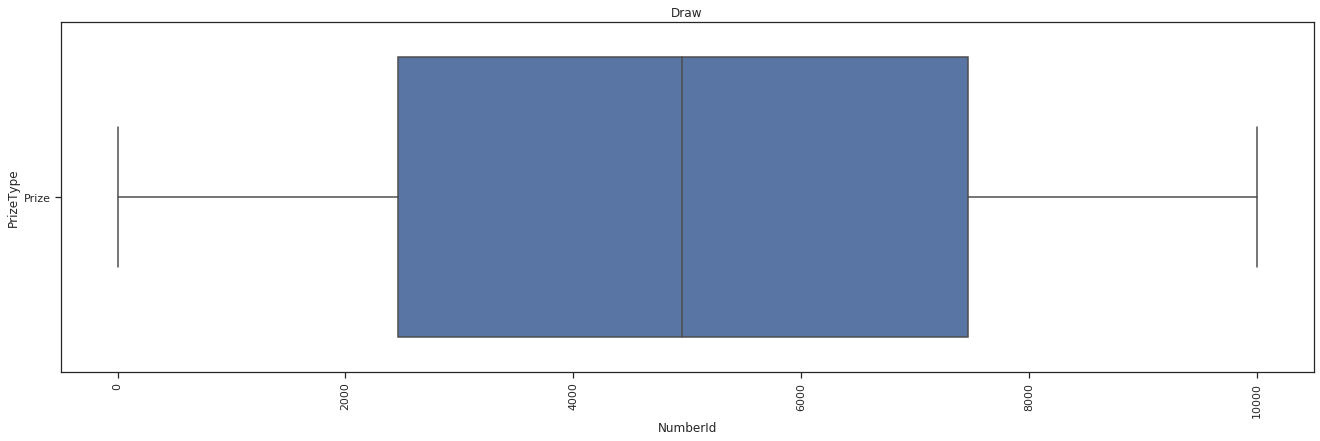

In [16]:
plt.figure(figsize=(20,6))
sns.boxplot(x='NumberId', y='PrizeType',data=data)
plt.xticks(rotation=90)
plt.title('Draw')

# print(data[data['NumberId']==1760])

## Making Labels

In [17]:
data['TotalStrike'] = 1
data.head(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
0,40792,1992-05-06 00:01:00,Prize,19,19,1
1,40792,1992-05-06 00:01:00,Prize,1124,1124,1
2,40792,1992-05-06 00:01:00,Prize,592,592,1
3,40792,1992-05-06 00:01:00,Prize,5311,5311,1
4,40792,1992-05-06 00:01:00,Prize,407,407,1
5,40792,1992-05-06 00:01:00,Prize,1949,1949,1
6,40792,1992-05-06 00:01:00,Prize,1606,1606,1
7,40792,1992-05-06 00:01:00,Prize,3775,3775,1
8,40792,1992-05-06 00:01:00,Prize,6226,6226,1
9,40792,1992-05-06 00:01:00,Prize,1271,1271,1


In [0]:
def make_cutoffs(start_date, end_date, threshold=0):
    # Find numbers exist before start date
    number_pool = data[data['DrawDate'] < start_date]['NumberId'].unique()
    tmp = pd.DataFrame({'NumberId': number_pool})
   
    # For numbers in the number pool, find their strike count between the start and end dates
    strike_counts = data[(data['NumberId'].isin(number_pool)) & 
        (data['DrawDate'] >= start_date) & 
        (data['DrawDate']< end_date)
    ].groupby('NumberId')['TotalStrike'].count().reset_index()
    
    number_of_draws = data[
                 (data['DrawDate'] >= start_date) & 
                 (data['DrawDate']< end_date)]['DrawDate'].nunique()
    # display(strike_counts)
    # print(number_of_draws)
    
    # Merge with all the number ids to record all customers who existed before start date
    strike_counts = strike_counts.merge(tmp, on='NumberId', how='right')
    
    # Set the total for any numbers who did not strike in the timeframe equal to 0
    strike_counts['TotalStrike'] = strike_counts['TotalStrike'].fillna(0)
    
    # Label is based on the threshold
    strike_counts['Label'] = (strike_counts['TotalStrike'] > threshold).astype(int)
        
    # The cutoff time is the start date
    strike_counts['cutoff_time'] = pd.to_datetime(start_date)
    strike_counts = strike_counts[['NumberId', 'cutoff_time', 'TotalStrike', 'Label']]
    
    #display(strike_counts[strike_counts['Label']==1].nunique())
    #display(strike_counts.sort_values(by='TotalStrike', ascending=False))
   
    return number_of_draws, strike_counts

In [0]:
TARGET_MONTH_YEAR = pd.datetime(2019,12,1)

In [0]:
# For testing purpose
data = data[data['DrawDate'] < TARGET_MONTH_YEAR]

In [21]:
data.tail(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
106503,503819,2019-11-30 00:01:00,Prize,8329,8329,1
106504,503819,2019-11-30 00:01:00,Prize,7187,7187,1
106505,503819,2019-11-30 00:01:00,Prize,5140,5140,1
106506,503819,2019-11-30 00:01:00,Prize,3515,3515,1
106507,503819,2019-11-30 00:01:00,Prize,6690,6690,1
106508,503819,2019-11-30 00:01:00,Prize,753,753,1
106509,503819,2019-11-30 00:01:00,Prize,7,7,1
106510,503819,2019-11-30 00:01:00,Prize,3337,3337,1
106511,503819,2019-11-30 00:01:00,Prize,2383,2383,1
106512,503819,2019-11-30 00:01:00,Prize,6692,6692,1


In [22]:
end_month_year = TARGET_MONTH_YEAR +  relativedelta(months=1)
end_month_year

datetime.datetime(2020, 1, 1, 0, 0)

In [23]:
number_of_draws, target_month_year = make_cutoffs(TARGET_MONTH_YEAR, end_month_year)
print(number_of_draws, len(target_month_year))
target_month_year[(target_month_year['Label']==1) & (target_month_year['TotalStrike']==2)].sort_values(by='TotalStrike', ascending=False).head()

0 10000


,NumberId,cutoff_time,TotalStrike,Label


In [24]:
data[data['NumberId'].isin([135,2513,5030])]

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
6255,67894,1994-01-27 00:01:00,Prize,2513,2513,1
6994,71194,1994-04-14 00:01:00,Prize,5030,5030,1
9126,80394,1994-11-13 00:01:00,Prize,2513,2513,1
11857,92295,1995-08-19 00:01:00,Prize,2513,2513,1
16285,111596,1996-11-10 00:01:00,Prize,2513,2513,1
19202,124197,1997-08-31 00:01:00,Prize,135,135,1
40002,214703,2003-04-05 00:01:00,Prize,5030,5030,1
46671,243705,2005-01-04 00:01:00,Prize,2513,2513,1
50329,259605,2005-12-10 00:01:00,Prize,2513,2513,1
55421,281707,2007-03-25 00:01:00,Prize,5030,5030,1


Text(0.5, 1.0, 'Label Distribution for Target Month Year')

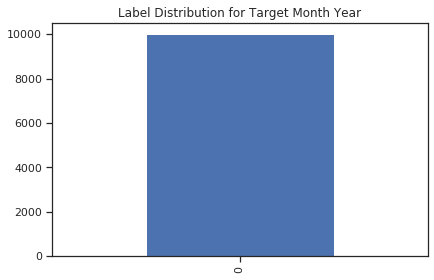

In [25]:
target_month_year['Label'].value_counts().plot.bar()
plt.title('Label Distribution for Target Month Year')

In [0]:
CUT_OFF_YEAR = TARGET_MONTH_YEAR

In [27]:
## Loop through each month starting from CUT_OFF_YEAR

# print(data['DrawDate'].max())
max_year_month = TARGET_MONTH_YEAR  + relativedelta(day=31)
print(f"Max month year: {max_year_month}")

start_year_month = CUT_OFF_YEAR

months_data = []
total_draws = 0
while start_year_month < max_year_month:
    start_date = start_year_month 
    end_date = start_date + relativedelta(months=1)
    start_year_month = start_year_month + relativedelta(months=1)
    print(f"Labels from {start_date} to {end_date}")
    draw_count, month_data = make_cutoffs(start_date, end_date)
    total_draws = total_draws + draw_count
    months_data.append(month_data)

print(f"Total draws: {total_draws}")
print(f"Total draws: {data[(data['DrawDate'] >= CUT_OFF_YEAR) & (data['DrawDate'] <= max_year_month)]['DrawDate'].nunique()}")
print(f"Total months:{len(months_data)}")
print(f"Total records count: {sum([len(l) for l in months_data])}")
print([len(l) for l in months_data])

Max month year: 2019-12-31 00:00:00
Labels from 2019-12-01 00:00:00 to 2020-01-01 00:00:00
Total draws: 0
Total draws: 0
Total months:1
Total records count: 10000
[10000]


In [28]:
labels = pd.concat(months_data)
labels.to_csv(DATASET_PATH/'labels.csv')
labels.describe()

,NumberId,TotalStrike,Label
count,10000.00000,10000.0,10000.0
mean,4999.50000,0.0,0.0
std,2886.89568,0.0,0.0
min,0.00000,0.0,0.0
25%,2499.75000,0.0,0.0
50%,4999.50000,0.0,0.0
75%,7499.25000,0.0,0.0
max,9999.00000,0.0,0.0


In [30]:
labels.NumberId.nunique(), labels.head(10)

(10000,    NumberId cutoff_time  TotalStrike  Label
 0        19  2019-12-01          0.0      0
 1      1124  2019-12-01          0.0      0
 2       592  2019-12-01          0.0      0
 3      5311  2019-12-01          0.0      0
 4       407  2019-12-01          0.0      0
 5      1949  2019-12-01          0.0      0
 6      1606  2019-12-01          0.0      0
 7      3775  2019-12-01          0.0      0
 8      6226  2019-12-01          0.0      0
 9      1271  2019-12-01          0.0      0)

In [32]:
labels.tail(10)

,NumberId,cutoff_time,TotalStrike,Label
9990,3479,2019-12-01,0.0,0
9991,6512,2019-12-01,0.0,0
9992,4996,2019-12-01,0.0,0
9993,3852,2019-12-01,0.0,0
9994,7940,2019-12-01,0.0,0
9995,5407,2019-12-01,0.0,0
9996,7709,2019-12-01,0.0,0
9997,9604,2019-12-01,0.0,0
9998,9659,2019-12-01,0.0,0
9999,5488,2019-12-01,0.0,0


## Automated Feature Engineering

In [33]:
es = ft.EntitySet(id="Lotto Results")

# Add the entire data table as an entity
es.entity_from_dataframe("Results",
                         dataframe=data,
                         index="results_index",
                         time_index = 'DrawDate')

es['Results']

2020-02-21 12:55:52,549 featuretools.entityset - WARNING    index results_index not found in dataframe, creating new integer column


Entity: Results
  Variables:
    results_index (dtype: index)
    DrawNo (dtype: numeric)
    DrawDate (dtype: datetime_time_index)
    PrizeType (dtype: categorical)
    LuckyNo (dtype: numeric)
    NumberId (dtype: numeric)
    TotalStrike (dtype: numeric)
  Shape:
    (Rows: 106513, Columns: 7)

In [34]:
es.normalize_entity(new_entity_id="Numbers",
                    base_entity_id="Results",
                    index="NumberId",
                    )

Entityset: Lotto Results
  Entities:
    Results [Rows: 106513, Columns: 7]
    Numbers [Rows: 10000, Columns: 2]
  Relationships:
    Results.NumberId -> Numbers.NumberId

In [35]:
es

Entityset: Lotto Results
  Entities:
    Results [Rows: 106513, Columns: 7]
    Numbers [Rows: 10000, Columns: 2]
  Relationships:
    Results.NumberId -> Numbers.NumberId

In [36]:
es['Numbers'].df.head(24)

,NumberId,first_Results_time
19,19,1992-05-06 00:01:00
1124,1124,1992-05-06 00:01:00
592,592,1992-05-06 00:01:00
5311,5311,1992-05-06 00:01:00
407,407,1992-05-06 00:01:00
1949,1949,1992-05-06 00:01:00
1606,1606,1992-05-06 00:01:00
3775,3775,1992-05-06 00:01:00
6226,6226,1992-05-06 00:01:00
1271,1271,1992-05-06 00:01:00


In [37]:
es['Results'].df.head(24)

,results_index,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
0,0,40792,1992-05-06 00:01:00,Prize,19,19,1
1,1,40792,1992-05-06 00:01:00,Prize,1124,1124,1
2,2,40792,1992-05-06 00:01:00,Prize,592,592,1
3,3,40792,1992-05-06 00:01:00,Prize,5311,5311,1
4,4,40792,1992-05-06 00:01:00,Prize,407,407,1
5,5,40792,1992-05-06 00:01:00,Prize,1949,1949,1
6,6,40792,1992-05-06 00:01:00,Prize,1606,1606,1
7,7,40792,1992-05-06 00:01:00,Prize,3775,3775,1
8,8,40792,1992-05-06 00:01:00,Prize,6226,6226,1
9,9,40792,1992-05-06 00:01:00,Prize,1271,1271,1


In [38]:
len(es['Results'].df)

106513

## Deep Feature Synthesis

In [39]:
# feature_matrix, feature_names = ft.dfs(entityset=es, target_entity='Numbers',
#                                         cutoff_time = labels, verbose = 2,
#                                         cutoff_time_in_index = True,
#                                         chunk_size = len(labels), n_jobs = 1,
#                                         max_depth = 1)
print(ft.__version__)
ft.list_primitives().T

0.13.2


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
name,std,median,avg_time_between,percent_true,num_unique,min,trend,mean,time_since_last,any,count,first,skew,n_most_common,num_true,entropy,max,mode,time_since_first,all,sum,last,equal,modulo_by_feature,week,haversine,less_than_equal_to,modulo_numeric,second,day,divide_numeric_scalar,latitude,less_than,or,greater_than_equal_to,multiply_boolean,not,time_since_previous,diff,greater_than,multiply_numeric,cum_max,subtract_numeric_scalar,time_since,add_numeric_scalar,cum_mean,num_characters,year,cum_sum,is_weekend,not_equal_scalar,equal_scalar,and,month,less_than_equal_to_scalar,minute,modulo_numeric_scalar,divide_by_feature,hour,less_than_scalar,longitude,divide_numeric,greater_than_equal_to_scalar,percentile,greater_than_scalar,absolute,multiply_numeric_scalar,negate,isin,is_null,scalar_subtract_numeric_feature,cum_min,num_words,subtract_numeric,add_numeric,cum_count,weekday,not_equal
type,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,aggregation,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform,transform
description,Computes the dispersion relative to the mean v...,Determines the middlemost number in a list of ...,Computes the average number of seconds between...,Determines the percent of `True` values.,"Determines the number of distinct values, igno...","Calculates the smallest value, ignoring `NaN` ...",Calculates the trend of a variable over time.,Computes the average for a list of values.,Calculates the time elapsed since the last dat...,Determines if any value is 'True' in a list.,"Determines the total number of values, excludi...",Determines the first value in a list.,Computes the extent to which a distribution di...,Determines the `n` most common elements.,Counts the number of `True` values.,Calculates the entropy for a categorical variable,"Calculates the highest value, ignoring `NaN` v...",Determines the most commonly repeated value.,Calculates the time elapsed since the first da...,Calculates if all values are 'True' in a list.,"Calculates the total addition, ignoring `NaN`.",Determines the last value in a list.,Determines if values in one list are equal to ...,Return the modulo of a scalar by each element ...,Determines the week of the year from a datetime.,Calculates the approximate haversine distance ...,Determines if values in one list are less than...,Element-wise modulo of two lists.,Determines the seconds value of a datetime.,Determines the day of the month from a datetime.,Divide each element in the list by a scalar.,Returns the first tuple value in a list of Lat...,Determines if values in one list are less than...,Element-wise logical OR of two lists.,Determines if values in one list are greater t...,Element-wise multiplication of two lists of bo...,Negates a boolean value.,Compute the time since the previous entry in a...,Compute the difference between the value in a ...,Determines if values in one list are greater t...,Element-wise multiplication of two lists.,Calculates the cumulative maximum.,Subtract a scalar from each element in the list.,Calculates time from a value to a specified cu...,Add

In [40]:
# default_agg_primitives =  ['std', 'max', 'min', 'mode', 'mean', 'skew', 'last', 'avg_time_between', 
#                            'count', 'sum', 'trend', 'percent_true', 'num_unique', 'time_since_last', 
#                            'time_since_first']
# default_trans_primitives =  ['cum_sum', 'cum_mean', 'month', 'day', 'percentile', 
#                               'time_since', 'time_since_previous', 'cum_min', 'cum_max']

default_agg_primitives =  ['std', 'max', 'min', 'mode', 'mean', 'skew', 'last', 'avg_time_between', 
                           'count', 'sum', 'trend', 'percent_true', 'num_unique']
default_trans_primitives =  ['cum_sum', 'cum_mean', 'month', 'day', 'percentile', 
                            'and', 'time_since', 'time_since_previous']

feature_matrix, feature_names = ft.dfs(entityset=es, target_entity='Numbers',
                                        agg_primitives = default_agg_primitives ,
                                        trans_primitives = default_trans_primitives,
                                        cutoff_time = labels, verbose = 1,
                                        cutoff_time_in_index = True,
                                        chunk_size = len(labels), n_jobs = 1,
                                        #chunk_size = 10000, n_jobs = -1,
                                        max_depth = 2)

Built 211 features
Elapsed: 06:20 | Progress: 100%|██████████


In [41]:
len(feature_matrix.columns), feature_matrix.columns

(213, Index(['STD(Results.LuckyNo)', 'STD(Results.DrawNo)',
        'STD(Results.TotalStrike)', 'MAX(Results.LuckyNo)',
        'MAX(Results.DrawNo)', 'MAX(Results.TotalStrike)',
        'MIN(Results.LuckyNo)', 'MIN(Results.DrawNo)',
        'MIN(Results.TotalStrike)', 'MODE(Results.PrizeType)',
        ...
        'PERCENTILE(SUM(Results.TotalStrike))',
        'PERCENTILE(NUM_UNIQUE(Results.PrizeType))',
        'PERCENTILE(SKEW(Results.TotalStrike))',
        'PERCENTILE(SKEW(Results.DrawNo))', 'PERCENTILE(LAST(Results.LuckyNo))',
        'PERCENTILE(SUM(Results.LuckyNo))', 'PERCENTILE(MAX(Results.DrawNo))',
        'PERCENTILE(LAST(Results.DrawNo))', 'TotalStrike', 'Label'],
       dtype='object', length=213))

In [42]:
len(feature_matrix)

10000

In [43]:
feature_matrix.head().T

NumberId,19,1124,592,5311,407
time,2019-12-01,2019-12-01,2019-12-01,2019-12-01,2019-12-01
STD(Results.LuckyNo),0,0,0,0,0
STD(Results.DrawNo),153048,149115,139261,149149,176871
STD(Results.TotalStrike),0,0,0,0,0
MAX(Results.LuckyNo),19,1124,592,5311,407
MAX(Results.DrawNo),464417,468517,465317,494219,497819
...,...,...,...,...,...
PERCENTILE(SUM(Results.LuckyNo)),0.0043,0.1247,0.0957,0.8057,0.0345
PERCENTILE(MAX(Results.DrawNo)),0.40115,0.44155,0.4099,0.80325,0.8712
PERCENTILE(LAST(Results.DrawNo)),0.40115,0.44155,0.4099,0.80325,0.8712


In [44]:
feature_matrix.shape

(10000, 213)

In [45]:
feature_matrix.head(2)

,,STD(Results.LuckyNo),STD(Results.DrawNo),STD(Results.TotalStrike),MAX(Results.LuckyNo),MAX(Results.DrawNo),MAX(Results.TotalStrike),MIN(Results.LuckyNo),MIN(Results.DrawNo),MIN(Results.TotalStrike),MODE(Results.PrizeType),MEAN(Results.LuckyNo),MEAN(Results.DrawNo),MEAN(Results.TotalStrike),SKEW(Results.LuckyNo),SKEW(Results.DrawNo),SKEW(Results.TotalStrike),LAST(Results.LuckyNo),LAST(Results.DrawNo),LAST(Results.results_index),LAST(Results.TotalStrike),LAST(Results.PrizeType),AVG_TIME_BETWEEN(Results.DrawDate),COUNT(Results),SUM(Results.LuckyNo),SUM(Results.DrawNo),SUM(Results.TotalStrike),"TREND(Results.LuckyNo, DrawDate)","TREND(Results.DrawNo, DrawDate)","TREND(Results.TotalStrike, DrawDate)",NUM_UNIQUE(Results.PrizeType),MONTH(first_Results_time),DAY(first_Results_time),TIME_SINCE(first_Results_time),TIME_SINCE_PREVIOUS(first_Results_time),STD(Results.PERCENTILE(TotalStrike)),STD(Results.PERCENTILE(DrawNo)),STD(Results.CUM_SUM(TotalStrike)),STD(Results.CUM_MEAN(TotalStrike)),STD(Results.CUM_MEAN(LuckyNo)),STD(Results.PERCENTILE(LuckyNo)),...,CUM_MEAN(MEAN(Results.TotalStrike)),CUM_MEAN(SUM(Results.TotalStrike)),CUM_MEAN(NUM_UNIQUE(Results.PrizeType)),CUM_MEAN(SKEW(Results.TotalStrike)),CUM_MEAN(SKEW(Results.DrawNo)),CUM_MEAN(LAST(Results.LuckyNo)),CUM_MEAN(SUM(Results.LuckyNo)),CUM_MEAN(MAX(Results.DrawNo)),CUM_MEAN(LAST(Results.DrawNo)),MONTH(LAST(Results.DrawDate)),DAY(LAST(Results.DrawDate)),PERCENTILE(MEAN(Results.DrawNo)),PERCENTILE(MIN(Results.DrawNo)),"PERCENTILE(TREND(Results.DrawNo, DrawDate))",PERCENTILE(MAX(Results.LuckyNo)),"PERCENTILE(TREND(Results.TotalStrike, DrawDate))",PERCENTILE(MIN(Results.LuckyNo)),PERCENTILE(SUM(Results.DrawNo)),PERCENTILE(LAST(Results.TotalStrike)),PERCENTILE(MIN(Results.TotalStrike)),PERCENTILE(STD(Results.LuckyNo)),PERCENTILE(MEAN(Results.LuckyNo)),PERCENTILE(SKEW(Results.LuckyNo)),PERCENTILE(STD(Results.TotalStrike)),PERCENTILE(COUNT(Results)),"PERCENTILE(TREND(Results.LuckyNo, DrawDate))",PERCENTILE(STD(Results.DrawNo)),PERCENTILE(AVG_TIME_BETWEEN(Results.DrawDate)),PERCENTILE(MAX(Results.TotalStrike)),PERCENTILE(MEAN(Results.TotalStrike)),PERCENTILE(SUM(Results.TotalStrike)),PERCENTILE(NUM_UNIQUE(Results.PrizeType)),PERCENTILE(SKEW(Results.TotalStrike)),PERCENTILE(SKEW(Results.DrawNo)),PERCENTILE(LAST(Results.LuckyNo)),PERCENTILE(SUM(Results.LuckyNo)),PERCENTILE(MAX(Results.DrawNo)),PERCENTILE(LAST(Results.DrawNo)),TotalStrike,Label
NumberId,time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19,2019-12-01,0.0,153047.954707,0.0,19,464417,1,19,40792,1,Prize,19,267562.761905,1,0.0,-0.072923,0.0,19,464417,97437,1,Prize,39934080.0,21,399,5618818,21,0.0,0.031955,0.0,1,5,6,870047940.0,NaN,0.0,0.330466,35199.652464,0.0,1084.384206,0.0,...,1.0,21.0,1.0,0.0,-0.072923,19.0,399.0,464417.0,464417.0,8,27,0.4555,0.0012,0.369733,0.0020,0.50005,0.0020,0.9914,0.50005,0.50005,0.50005,0.0020,0.50005,0.50005,0.99715,0.50005,0.8321,0.0112,0.50005,0.50005,0.99715,0.50005,0.50005,0.441297,0.0020,0.0043,0.40115,0.40115,0.0,0
1124,2019-12-01,0.0,149114.505460,0.0,1124,468517,1,1124,40792,1,Prize,1124,321027.000000,1,0.0,-0.661895,0.0,1124,468517,98380,1,Prize,80585280.0,11,12364,3531297,11,0.0,0.032205,0.0,1,5,6,870047940.0,0.0,0.0,0.321973,34296.646677,0.0,1328.949756,0.0,...,1.0,16.0,1.0,0.0,-0.367409,571.5,6381.5,466467.0,466467.0,11,18,0.8734,0.0012,0.674207,0.1125,0.50005,0.1125,0.7479,0.50005,0.50005,0.50005,0.1125,0.50005,0.50005,0.56205,0.50005,0.7801,0.5993,0.50005,0.50005,0.56205,0.50005,0.50005,0.113102,0.1125,0.1247,0.44155,0.44155,0.0,0


In [0]:
#feature_matrix[(feature_matrix['NumberId']==0) & (feature_matrix['Label']==1)].head(10)

## Correlations

In [47]:
# Save the original feature matrix
origin_feature_matrix = feature_matrix

feature_matrix = pd.get_dummies(feature_matrix).reset_index()
feature_matrix.shape

(10000, 215)

In [48]:
feature_matrix.head(10)

,NumberId,time,STD(Results.LuckyNo),STD(Results.DrawNo),STD(Results.TotalStrike),MAX(Results.LuckyNo),MAX(Results.DrawNo),MAX(Results.TotalStrike),MIN(Results.LuckyNo),MIN(Results.DrawNo),MIN(Results.TotalStrike),MEAN(Results.LuckyNo),MEAN(Results.DrawNo),MEAN(Results.TotalStrike),SKEW(Results.LuckyNo),SKEW(Results.DrawNo),SKEW(Results.TotalStrike),LAST(Results.LuckyNo),LAST(Results.DrawNo),LAST(Results.results_index),LAST(Results.TotalStrike),AVG_TIME_BETWEEN(Results.DrawDate),COUNT(Results),SUM(Results.LuckyNo),SUM(Results.DrawNo),SUM(Results.TotalStrike),"TREND(Results.LuckyNo, DrawDate)","TREND(Results.DrawNo, DrawDate)","TREND(Results.TotalStrike, DrawDate)",NUM_UNIQUE(Results.PrizeType),MONTH(first_Results_time),DAY(first_Results_time),TIME_SINCE(first_Results_time),TIME_SINCE_PREVIOUS(first_Results_time),STD(Results.PERCENTILE(TotalStrike)),STD(Results.PERCENTILE(DrawNo)),STD(Results.CUM_SUM(TotalStrike)),STD(Results.CUM_MEAN(TotalStrike)),STD(Results.CUM_MEAN(LuckyNo)),STD(Results.PERCENTILE(LuckyNo)),...,CUM_MEAN(NUM_UNIQUE(Results.PrizeType)),CUM_MEAN(SKEW(Results.TotalStrike)),CUM_MEAN(SKEW(Results.DrawNo)),CUM_MEAN(LAST(Results.LuckyNo)),CUM_MEAN(SUM(Results.LuckyNo)),CUM_MEAN(MAX(Results.DrawNo)),CUM_MEAN(LAST(Results.DrawNo)),MONTH(LAST(Results.DrawDate)),DAY(LAST(Results.DrawDate)),PERCENTILE(MEAN(Results.DrawNo)),PERCENTILE(MIN(Results.DrawNo)),"PERCENTILE(TREND(Results.DrawNo, DrawDate))",PERCENTILE(MAX(Results.LuckyNo)),"PERCENTILE(TREND(Results.TotalStrike, DrawDate))",PERCENTILE(MIN(Results.LuckyNo)),PERCENTILE(SUM(Results.DrawNo)),PERCENTILE(LAST(Results.TotalStrike)),PERCENTILE(MIN(Results.TotalStrike)),PERCENTILE(STD(Results.LuckyNo)),PERCENTILE(MEAN(Results.LuckyNo)),PERCENTILE(SKEW(Results.LuckyNo)),PERCENTILE(STD(Results.TotalStrike)),PERCENTILE(COUNT(Results)),"PERCENTILE(TREND(Results.LuckyNo, DrawDate))",PERCENTILE(STD(Results.DrawNo)),PERCENTILE(AVG_TIME_BETWEEN(Results.DrawDate)),PERCENTILE(MAX(Results.TotalStrike)),PERCENTILE(MEAN(Results.TotalStrike)),PERCENTILE(SUM(Results.TotalStrike)),PERCENTILE(NUM_UNIQUE(Results.PrizeType)),PERCENTILE(SKEW(Results.TotalStrike)),PERCENTILE(SKEW(Results.DrawNo)),PERCENTILE(LAST(Results.LuckyNo)),PERCENTILE(SUM(Results.LuckyNo)),PERCENTILE(MAX(Results.DrawNo)),PERCENTILE(LAST(Results.DrawNo)),TotalStrike,Label,MODE(Results.PrizeType)_Prize,LAST(Results.PrizeType)_Prize
0,19,2019-12-01,0.0,153047.954707,0.0,19,464417,1,19,40792,1,19,267562.761905,1,0.0,-0.072923,0.0,19,464417,97437,1,3.993408e+07,21,399,5618818,21,0.0,0.031955,0.0,1,5,6,870047940.0,NaN,0.0,0.330466,35199.652464,0.0,1084.384206,0.0,...,1.0,0.0,-0.072923,19.000000,399.000000,464417.000000,464417.000000,8,27,0.45550,0.0012,0.369733,0.0020,0.50005,0.0020,0.9914,0.50005,0.50005,0.50005,0.0020,0.50005,0.50005,0.99715,0.50005,0.8321,0.01120,0.50005,0.50005,0.99715,0.50005,0.50005,0.441297,0.0020,0.0043,0.40115,0.40115,0.0,0,1,1
1,1124,2019-12-01,0.0,149114.505460,0.0,1124,468517,1,1124,40792,1,1124,321027.000000,1,0.0,-0.661895,0.0,1124,468517,98380,1,8.058528e+07,11,12364,3531297,11,0.0,0.032205,0.0,1,5,6,870047940.0,0.0,0.0,0.321973,34296.646677,0.0,1328.949756,0.0,...,1.0,0.0,-0.367409,571.500000,6381.500000,466467.000000,466467.000000,11,18,0.87340,0.0012,0.674207,0.1125,0.50005,0.1125,0.7479,0.50005,0.50005,0.50005,0.1125,0.50005,0.50005,0.56205,0.50005,0.7801,0.59930,0.50005,0.50005,0.56205,0.50005,0.50005,0.113102,0.1125,0.1247,0.44155,0.44155,0.0,0,1,1
2,592,2019-12-01,0.0,139261.320490,0.0,592,465317,1,592,40792,1,592,277062.375000,1,0.0,-0.464576,0.0,592,465317,97649,1,5.334336e+07,16,9472,4432998,16,0.0,0.031779,0.0,1,5,6,870047940.0,0.0,0.0,0.300698,32030.735419,0.0,1101.132220,0.0,...,1.0,0.0,-0.399798,578.333333,7411.666667,466083.666667,466083.666667,9,13,0.54500,0.0012,0.189471,0.0593,0.50005,0.0593,0.9286,0.50005,0.50005,0.50005,0.0593,0.50005,0.50005,0.94085,0.50005,0.6176,0.12290,0.50005,0.50005,0.94085,0.50005,0.50005,0.193174,0.0593,0.0957,0.40990,0.40990,0.0,0,1,1
3,5311,2019-12

In [52]:
corrs = feature_matrix.corr().sort_values('TotalStrike')
corrs['TotalStrike'].head()

NumberId                   NaN
STD(Results.LuckyNo)       NaN
STD(Results.DrawNo)        NaN
STD(Results.TotalStrike)   NaN
MAX(Results.LuckyNo)       NaN
Name: TotalStrike, dtype: float64

In [53]:
corrs['TotalStrike'].dropna().tail(60)

Series([], Name: TotalStrike, dtype: float64)

In [0]:
feature_matrix['month'] = feature_matrix['time'].dt.month
feature_matrix['year'] = feature_matrix['time'].dt.year

In [55]:
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 217 entries, NumberId to year
dtypes: datetime64[ns](1), float64(155), int64(59), uint8(2)
memory usage: 16.4 MB


In [56]:
feature_matrix.head()

,NumberId,time,STD(Results.LuckyNo),STD(Results.DrawNo),STD(Results.TotalStrike),MAX(Results.LuckyNo),MAX(Results.DrawNo),MAX(Results.TotalStrike),MIN(Results.LuckyNo),MIN(Results.DrawNo),MIN(Results.TotalStrike),MEAN(Results.LuckyNo),MEAN(Results.DrawNo),MEAN(Results.TotalStrike),SKEW(Results.LuckyNo),SKEW(Results.DrawNo),SKEW(Results.TotalStrike),LAST(Results.LuckyNo),LAST(Results.DrawNo),LAST(Results.results_index),LAST(Results.TotalStrike),AVG_TIME_BETWEEN(Results.DrawDate),COUNT(Results),SUM(Results.LuckyNo),SUM(Results.DrawNo),SUM(Results.TotalStrike),"TREND(Results.LuckyNo, DrawDate)","TREND(Results.DrawNo, DrawDate)","TREND(Results.TotalStrike, DrawDate)",NUM_UNIQUE(Results.PrizeType),MONTH(first_Results_time),DAY(first_Results_time),TIME_SINCE(first_Results_time),TIME_SINCE_PREVIOUS(first_Results_time),STD(Results.PERCENTILE(TotalStrike)),STD(Results.PERCENTILE(DrawNo)),STD(Results.CUM_SUM(TotalStrike)),STD(Results.CUM_MEAN(TotalStrike)),STD(Results.CUM_MEAN(LuckyNo)),STD(Results.PERCENTILE(LuckyNo)),...,CUM_MEAN(SKEW(Results.DrawNo)),CUM_MEAN(LAST(Results.LuckyNo)),CUM_MEAN(SUM(Results.LuckyNo)),CUM_MEAN(MAX(Results.DrawNo)),CUM_MEAN(LAST(Results.DrawNo)),MONTH(LAST(Results.DrawDate)),DAY(LAST(Results.DrawDate)),PERCENTILE(MEAN(Results.DrawNo)),PERCENTILE(MIN(Results.DrawNo)),"PERCENTILE(TREND(Results.DrawNo, DrawDate))",PERCENTILE(MAX(Results.LuckyNo)),"PERCENTILE(TREND(Results.TotalStrike, DrawDate))",PERCENTILE(MIN(Results.LuckyNo)),PERCENTILE(SUM(Results.DrawNo)),PERCENTILE(LAST(Results.TotalStrike)),PERCENTILE(MIN(Results.TotalStrike)),PERCENTILE(STD(Results.LuckyNo)),PERCENTILE(MEAN(Results.LuckyNo)),PERCENTILE(SKEW(Results.LuckyNo)),PERCENTILE(STD(Results.TotalStrike)),PERCENTILE(COUNT(Results)),"PERCENTILE(TREND(Results.LuckyNo, DrawDate))",PERCENTILE(STD(Results.DrawNo)),PERCENTILE(AVG_TIME_BETWEEN(Results.DrawDate)),PERCENTILE(MAX(Results.TotalStrike)),PERCENTILE(MEAN(Results.TotalStrike)),PERCENTILE(SUM(Results.TotalStrike)),PERCENTILE(NUM_UNIQUE(Results.PrizeType)),PERCENTILE(SKEW(Results.TotalStrike)),PERCENTILE(SKEW(Results.DrawNo)),PERCENTILE(LAST(Results.LuckyNo)),PERCENTILE(SUM(Results.LuckyNo)),PERCENTILE(MAX(Results.DrawNo)),PERCENTILE(LAST(Results.DrawNo)),TotalStrike,Label,MODE(Results.PrizeType)_Prize,LAST(Results.PrizeType)_Prize,month,year
0,19,2019-12-01,0.0,153047.954707,0.0,19,464417,1,19,40792,1,19,267562.761905,1,0.0,-0.072923,0.0,19,464417,97437,1,39934080.0,21,399,5618818,21,0.0,0.031955,0.0,1,5,6,870047940.0,NaN,0.0,0.330466,35199.652464,0.0,1084.384206,0.0,...,-0.072923,19.000000,399.000000,464417.000000,464417.000000,8,27,0.4555,0.0012,0.369733,0.0020,0.50005,0.0020,0.9914,0.50005,0.50005,0.50005,0.0020,0.50005,0.50005,0.99715,0.50005,0.8321,0.01120,0.50005,0.50005,0.99715,0.50005,0.50005,0.441297,0.0020,0.0043,0.40115,0.40115,0.0,0,1,1,12,2019
1,1124,2019-12-01,0.0,149114.505460,0.0,1124,468517,1,1124,40792,1,1124,321027.000000,1,0.0,-0.661895,0.0,1124,468517,98380,1,80585280.0,11,12364,3531297,11,0.0,0.032205,0.0,1,5,6,870047940.0,0.0,0.0,0.321973,34296.646677,0.0,1328.949756,0.0,...,-0.367409,571.500000,6381.500000,466467.000000,466467.000000,11,18,0.8734,0.0012,0.674207,0.1125,0.50005,0.1125,0.7479,0.50005,0.50005,0.50005,0.1125,0.50005,0.50005,0.56205,0.50005,0.7801,0.59930,0.50005,0.50005,0.56205,0.50005,0.50005,0.113102,0.1125,0.1247,0.44155,0.44155,0.0,0,1,1,12,2019
2,592,2019-12-01,0.0,139261.320490,0.0,592,465317,1,592,40792,1,592,277062.375000,1,0.0,-0.464576,0.0,592,465317,97649,1,53343360.0,16,9472,4432998,16,0.0,0.031779,0.0,1,5,6,870047940.0,0.0,0.0,0.300698,32030.735419,0.0,1101.132220,0.0,...,-0.399798,578.333333,7411.666667,466083.666667,466083.666667,9,13,0.5450,0.0012,0.189471,0.0593,0.50005,0.0593,0.9286,0.50005,0.50005,0.50005,0.0593,0.50005,0.50005,0.94085,0.50005,0.6176,0.12290,0.50005,0.50005,0.94085,0.50005,0.50005,0.193174,0.0593,0.0957,0.40990,0.40990,0.0,0,1,1,12,2019
3,5311,2019-12-01,0.0,149149.256699,0.0,5311,494219,1,5311,40792,1,5311,255355.000000,1,

In [57]:
feature_matrix.tail()

,NumberId,time,STD(Results.LuckyNo),STD(Results.DrawNo),STD(Results.TotalStrike),MAX(Results.LuckyNo),MAX(Results.DrawNo),MAX(Results.TotalStrike),MIN(Results.LuckyNo),MIN(Results.DrawNo),MIN(Results.TotalStrike),MEAN(Results.LuckyNo),MEAN(Results.DrawNo),MEAN(Results.TotalStrike),SKEW(Results.LuckyNo),SKEW(Results.DrawNo),SKEW(Results.TotalStrike),LAST(Results.LuckyNo),LAST(Results.DrawNo),LAST(Results.results_index),LAST(Results.TotalStrike),AVG_TIME_BETWEEN(Results.DrawDate),COUNT(Results),SUM(Results.LuckyNo),SUM(Results.DrawNo),SUM(Results.TotalStrike),"TREND(Results.LuckyNo, DrawDate)","TREND(Results.DrawNo, DrawDate)","TREND(Results.TotalStrike, DrawDate)",NUM_UNIQUE(Results.PrizeType),MONTH(first_Results_time),DAY(first_Results_time),TIME_SINCE(first_Results_time),TIME_SINCE_PREVIOUS(first_Results_time),STD(Results.PERCENTILE(TotalStrike)),STD(Results.PERCENTILE(DrawNo)),STD(Results.CUM_SUM(TotalStrike)),STD(Results.CUM_MEAN(TotalStrike)),STD(Results.CUM_MEAN(LuckyNo)),STD(Results.PERCENTILE(LuckyNo)),...,CUM_MEAN(SKEW(Results.DrawNo)),CUM_MEAN(LAST(Results.LuckyNo)),CUM_MEAN(SUM(Results.LuckyNo)),CUM_MEAN(MAX(Results.DrawNo)),CUM_MEAN(LAST(Results.DrawNo)),MONTH(LAST(Results.DrawDate)),DAY(LAST(Results.DrawDate)),PERCENTILE(MEAN(Results.DrawNo)),PERCENTILE(MIN(Results.DrawNo)),"PERCENTILE(TREND(Results.DrawNo, DrawDate))",PERCENTILE(MAX(Results.LuckyNo)),"PERCENTILE(TREND(Results.TotalStrike, DrawDate))",PERCENTILE(MIN(Results.LuckyNo)),PERCENTILE(SUM(Results.DrawNo)),PERCENTILE(LAST(Results.TotalStrike)),PERCENTILE(MIN(Results.TotalStrike)),PERCENTILE(STD(Results.LuckyNo)),PERCENTILE(MEAN(Results.LuckyNo)),PERCENTILE(SKEW(Results.LuckyNo)),PERCENTILE(STD(Results.TotalStrike)),PERCENTILE(COUNT(Results)),"PERCENTILE(TREND(Results.LuckyNo, DrawDate))",PERCENTILE(STD(Results.DrawNo)),PERCENTILE(AVG_TIME_BETWEEN(Results.DrawDate)),PERCENTILE(MAX(Results.TotalStrike)),PERCENTILE(MEAN(Results.TotalStrike)),PERCENTILE(SUM(Results.TotalStrike)),PERCENTILE(NUM_UNIQUE(Results.PrizeType)),PERCENTILE(SKEW(Results.TotalStrike)),PERCENTILE(SKEW(Results.DrawNo)),PERCENTILE(LAST(Results.LuckyNo)),PERCENTILE(SUM(Results.LuckyNo)),PERCENTILE(MAX(Results.DrawNo)),PERCENTILE(LAST(Results.DrawNo)),TotalStrike,Label,MODE(Results.PrizeType)_Prize,LAST(Results.PrizeType)_Prize,month,year
9995,5407,2019-12-01,0.0,33816.271769,0.0,5407,426715,1,5407,366112,1,5407,405080.666667,1,0.0,-1.700598,0.0,5407,426715,88778,1,5.365440e+07,3,16221,1215242,3,0.0,0.033921,0.0,1,2,19,245548740.0,12787200.0,0.0,0.073018,7771.970235,0.0,1.968982,0.0,...,0.002267,4998.253301,52988.907963,460852.677071,460852.677071,7,15,0.9981,0.9996,0.999700,0.5408,0.50005,0.5408,0.0302,0.50005,0.50005,0.50005,0.5408,0.50005,0.50005,0.00400,0.50005,0.0007,0.1281,0.50005,0.50005,0.00400,0.50005,0.50005,0.006206,0.5408,0.16650,0.16560,0.16560,0.0,0,1,1,12,2019
9996,7709,2019-12-01,0.0,39368.855047,0.0,7709,501619,1,7709,373212,1,7709,438690.500000,1,0.0,0.112795,0.0,7709,501619,105992,1,3.264686e+07,8,61672,3509524,8,0.0,0.033760,0.0,1,7,15,232847940.0,12700800.0,0.0,0.085007,9055.400179,0.0,1.602046,0.0,...,0.002278,4998.524457,52989.776533,460856.754926,460856.754926,10,12,0.9998,0.9997,0.997798,0.7710,0.50005,0.7710,0.7429,0.50005,0.50005,0.50005,0.7710,0.50005,0.50005,0.21530,0.50005,0.0011,0.0013,0.50005,0.50005,0.21530,0.50005,0.50005,0.585227,0.7710,0.62920,0.95045,0.95045,0.0,0,1,1,12,2019
9997,9604,2019-12-01,0.0,69017.864484,0.0,9604,492419,1,9604,394813,1,9604,443616.000000,1,NaN,NaN,NaN,9604,492419,103882,1,1.728000e+08,2,19208,887232,2,NaN,NaN,NaN,1,10,1,194572740.0,38275200.0,0.0,0.149025,15872.425917,0.0,1.466753,0.0,...,NaN,4998.985097,52986.397680,460859.911782,460859.911782,3,24,0.9999,0.9998,NaN,0.9605,NaN,0.9605,0.0088,0.50005,0.50005,0.50005,0.9605,NaN,0.50005,0.00050,NaN,0.0114,0.9807,0.50005,0.50005,0.00050,0.50005,NaN,NaN,0.9605,0.19935,0.76960,0.76960,0.0,0,1,1,12,2019
9998,9659,2019-12-01,0.0,30474.905355,0.0,9659,488518,1,9659,414714,1,9659,460600.000

In [58]:
display(feature_matrix.describe())

,NumberId,STD(Results.LuckyNo),STD(Results.DrawNo),STD(Results.TotalStrike),MAX(Results.LuckyNo),MAX(Results.DrawNo),MAX(Results.TotalStrike),MIN(Results.LuckyNo),MIN(Results.DrawNo),MIN(Results.TotalStrike),MEAN(Results.LuckyNo),MEAN(Results.DrawNo),MEAN(Results.TotalStrike),SKEW(Results.LuckyNo),SKEW(Results.DrawNo),SKEW(Results.TotalStrike),LAST(Results.LuckyNo),LAST(Results.DrawNo),LAST(Results.results_index),LAST(Results.TotalStrike),AVG_TIME_BETWEEN(Results.DrawDate),COUNT(Results),SUM(Results.LuckyNo),SUM(Results.DrawNo),SUM(Results.TotalStrike),"TREND(Results.LuckyNo, DrawDate)","TREND(Results.DrawNo, DrawDate)","TREND(Results.TotalStrike, DrawDate)",NUM_UNIQUE(Results.PrizeType),MONTH(first_Results_time),DAY(first_Results_time),TIME_SINCE(first_Results_time),TIME_SINCE_PREVIOUS(first_Results_time),STD(Results.PERCENTILE(TotalStrike)),STD(Results.PERCENTILE(DrawNo)),STD(Results.CUM_SUM(TotalStrike)),STD(Results.CUM_MEAN(TotalStrike)),STD(Results.CUM_MEAN(LuckyNo)),STD(Results.PERCENTILE(LuckyNo)),STD(Results.CUM_SUM(DrawNo)),...,CUM_MEAN(SKEW(Results.DrawNo)),CUM_MEAN(LAST(Results.LuckyNo)),CUM_MEAN(SUM(Results.LuckyNo)),CUM_MEAN(MAX(Results.DrawNo)),CUM_MEAN(LAST(Results.DrawNo)),MONTH(LAST(Results.DrawDate)),DAY(LAST(Results.DrawDate)),PERCENTILE(MEAN(Results.DrawNo)),PERCENTILE(MIN(Results.DrawNo)),"PERCENTILE(TREND(Results.DrawNo, DrawDate))",PERCENTILE(MAX(Results.LuckyNo)),"PERCENTILE(TREND(Results.TotalStrike, DrawDate))",PERCENTILE(MIN(Results.LuckyNo)),PERCENTILE(SUM(Results.DrawNo)),PERCENTILE(LAST(Results.TotalStrike)),PERCENTILE(MIN(Results.TotalStrike)),PERCENTILE(STD(Results.LuckyNo)),PERCENTILE(MEAN(Results.LuckyNo)),PERCENTILE(SKEW(Results.LuckyNo)),PERCENTILE(STD(Results.TotalStrike)),PERCENTILE(COUNT(Results)),"PERCENTILE(TREND(Results.LuckyNo, DrawDate))",PERCENTILE(STD(Results.DrawNo)),PERCENTILE(AVG_TIME_BETWEEN(Results.DrawDate)),PERCENTILE(MAX(Results.TotalStrike)),PERCENTILE(MEAN(Results.TotalStrike)),PERCENTILE(SUM(Results.TotalStrike)),PERCENTILE(NUM_UNIQUE(Results.PrizeType)),PERCENTILE(SKEW(Results.TotalStrike)),PERCENTILE(SKEW(Results.DrawNo)),PERCENTILE(LAST(Results.LuckyNo)),PERCENTILE(SUM(Results.LuckyNo)),PERCENTILE(MAX(Results.DrawNo)),PERCENTILE(LAST(Results.DrawNo)),TotalStrike,Label,MODE(Results.PrizeType)_Prize,LAST(Results.PrizeType)_Prize,month,year
count,10000.00000,10000.0,10000.000000,10000.0,10000.00000,10000.000000,10000.0,10000.00000,10000.000000,10000.0,10000.00000,10000.000000,10000.0,9991.0,9991.000000,9991.0,10000.00000,10000.000000,10000.000000,10000.0,1.000000e+04,10000.000000,10000.00000,1.000000e+04,10000.000000,9991.0,9991.000000,9991.0,10000.0,10000.000000,10000.000000,1.000000e+04,9.999000e+03,10000.0,10000.000000,10000.000000,10000.0,10000.000000,10000.0,1.000000e+04,...,9991.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9991.000000,10000.000000,9.991000e+03,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.991000e+03,1.000000e+04,10000.000000,9.991000e+03,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,9.991000e+03,9991.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4999.50000,0.0,131752.355861,0.0,4999.50000,460862.613300,1.0,4999.50000,83988.676000,1.0,4999.50000,272245.280105,1.0,0.0,0.002373,0.0,4999.50000,460862.613300,96621.589500,1.0,8.171873e+07,10.651300,52983.24220,2.900347e+06,10.651300,0.0,0.032070,0.0,1.0,6.671400,15.660900,7.834829e+08,7.276472e+04,0.0,0.284474,30300.182060,0.0,10.956338,0.0,8.408713e+09,...,0.002893,4997.240055,56196.039621,460482.341149,460482.341149,6.766000,15.883900,0.500050,0.500050,0.500050,0.500050,5.000500e-01,0.500050,0.500050,5.000500e-01,5.000500e-01,5.000500e-01,0.500050,5.000500e-01,5.000500e-01,0.500050,5.000500e-01,0.500050,0.500050,5.000500e-01,5.000500e-01,0.500050,5.000500e-01,5.000500e-01,0.500050,0.500050,0.500050,0.500050,

## Save feature matrix

In [0]:
# https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
if COLAB:
    #!ls /content/gdrive/My\ Drive/
    feature_matrix.to_feather(DATASET)
    origin_feature_matrix.to_pickle(DATASET_PATH/f"{FEATURE_DATASET_PREFIX}_orig.pkl")

In [60]:
if COLAB:
  !cd gdrive/"My Drive"/datasets/ && ls -l --block-size=M

total 7736M
-rw------- 1 root root 1548M Jan  7 00:07 feature_matrix_d2_v1.pkl
-rw------- 1 root root 2454M Jan 12 01:24 feature_matrix_d2_v2.ft
-rw------- 1 root root 1585M Jan 12 23:39 feature_matrix_d2_v3.ft
-rw------- 1 root root   17M Feb 21 13:07 feature_matrix_snapshot.ft
-rw------- 1 root root   17M Feb 21 13:07 feature_matrix_snapshot_origin.pkl
-rw------- 1 root root    5M Jan 30 04:33 orig_X_test.ft
-rw------- 1 root root  415M Jan 30 04:33 orig_X_train.ft
-rw------- 1 root root    1M Jan 30 04:33 orig_y_test.ft
-rw------- 1 root root    7M Jan 30 04:33 orig_y_train.ft
-rw------- 1 root root   19M Feb 16 14:07 test_X_test.ft
-rw------- 1 root root 1667M Feb 16 14:08 test_X_train.ft
-rw------- 1 root root    1M Feb 16 14:07 test_y_test.ft
-rw------- 1 root root    7M Feb 16 14:07 test_y_train.ft


### Validation

In [0]:
feature_matrix = pd.read_feather(DATASET)

In [23]:
feature_matrix.shape

(10000, 217)

In [24]:
feature_matrix.describe().round(2)

,NumberId,STD(Results.LuckyNo),STD(Results.DrawNo),STD(Results.TotalStrike),MAX(Results.LuckyNo),MAX(Results.DrawNo),MAX(Results.TotalStrike),MIN(Results.LuckyNo),MIN(Results.DrawNo),MIN(Results.TotalStrike),MEAN(Results.LuckyNo),MEAN(Results.DrawNo),MEAN(Results.TotalStrike),SKEW(Results.LuckyNo),SKEW(Results.DrawNo),SKEW(Results.TotalStrike),LAST(Results.LuckyNo),LAST(Results.DrawNo),LAST(Results.results_index),LAST(Results.TotalStrike),AVG_TIME_BETWEEN(Results.DrawDate),COUNT(Results),SUM(Results.LuckyNo),SUM(Results.DrawNo),SUM(Results.TotalStrike),"TREND(Results.LuckyNo, DrawDate)","TREND(Results.DrawNo, DrawDate)","TREND(Results.TotalStrike, DrawDate)",NUM_UNIQUE(Results.PrizeType),MONTH(first_Results_time),DAY(first_Results_time),TIME_SINCE(first_Results_time),TIME_SINCE_PREVIOUS(first_Results_time),STD(Results.PERCENTILE(TotalStrike)),STD(Results.PERCENTILE(DrawNo)),STD(Results.CUM_SUM(TotalStrike)),STD(Results.CUM_MEAN(TotalStrike)),STD(Results.CUM_MEAN(LuckyNo)),STD(Results.PERCENTILE(LuckyNo)),STD(Results.CUM_SUM(DrawNo)),...,CUM_MEAN(SKEW(Results.DrawNo)),CUM_MEAN(LAST(Results.LuckyNo)),CUM_MEAN(SUM(Results.LuckyNo)),CUM_MEAN(MAX(Results.DrawNo)),CUM_MEAN(LAST(Results.DrawNo)),MONTH(LAST(Results.DrawDate)),DAY(LAST(Results.DrawDate)),PERCENTILE(MEAN(Results.DrawNo)),PERCENTILE(MIN(Results.DrawNo)),"PERCENTILE(TREND(Results.DrawNo, DrawDate))",PERCENTILE(MAX(Results.LuckyNo)),"PERCENTILE(TREND(Results.TotalStrike, DrawDate))",PERCENTILE(MIN(Results.LuckyNo)),PERCENTILE(SUM(Results.DrawNo)),PERCENTILE(LAST(Results.TotalStrike)),PERCENTILE(MIN(Results.TotalStrike)),PERCENTILE(STD(Results.LuckyNo)),PERCENTILE(MEAN(Results.LuckyNo)),PERCENTILE(SKEW(Results.LuckyNo)),PERCENTILE(STD(Results.TotalStrike)),PERCENTILE(COUNT(Results)),"PERCENTILE(TREND(Results.LuckyNo, DrawDate))",PERCENTILE(STD(Results.DrawNo)),PERCENTILE(AVG_TIME_BETWEEN(Results.DrawDate)),PERCENTILE(MAX(Results.TotalStrike)),PERCENTILE(MEAN(Results.TotalStrike)),PERCENTILE(SUM(Results.TotalStrike)),PERCENTILE(NUM_UNIQUE(Results.PrizeType)),PERCENTILE(SKEW(Results.TotalStrike)),PERCENTILE(SKEW(Results.DrawNo)),PERCENTILE(LAST(Results.LuckyNo)),PERCENTILE(SUM(Results.LuckyNo)),PERCENTILE(MAX(Results.DrawNo)),PERCENTILE(LAST(Results.DrawNo)),TotalStrike,Label,MODE(Results.PrizeType)_Prize,LAST(Results.PrizeType)_Prize,month,year
count,10000.00,10000.0,10000.00,10000.0,10000.00,10000.00,10000.0,10000.00,10000.00,10000.0,10000.00,10000.00,10000.0,9991.0,9991.00,9991.0,10000.00,10000.00,10000.00,10000.0,1.000000e+04,10000.00,10000.00,10000.00,10000.00,9991.0,9991.00,9991.0,10000.0,10000.00,10000.00,1.000000e+04,9999.00,10000.0,10000.00,10000.00,10000.0,10000.00,10000.0,1.000000e+04,...,9991.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,9991.00,10000.00,9991.0,10000.00,10000.00,10000.0,10000.0,10000.0,10000.00,9991.0,10000.0,10000.00,9991.0,10000.00,10000.00,10000.0,10000.0,10000.00,10000.0,9991.0,9991.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4999.50,0.0,131752.36,0.0,4999.50,460862.61,1.0,4999.50,83988.68,1.0,4999.50,272245.28,1.0,0.0,0.00,0.0,4999.50,460862.61,96621.59,1.0,8.171873e+07,10.65,52983.24,2900347.17,10.65,0.0,0.03,0.0,1.0,6.67,15.66,7.834829e+08,72764.72,0.0,0.28,30300.18,0.0,10.96,0.0,8.408713e+09,...,0.00,4997.24,56196.04,460482.34,460482.34,6.77,15.88,0.50,0.50,0.50,0.50,0.5,0.50,0.50,0.5,0.5,0.5,0.50,0.5,0.5,0.50,0.5,0.50,0.50,0.5,0.5,0.50,0.5,0.5,0.50,0.50,0.50,0.50,0.50,0.0,0.0,1.0,1.0,12.0,2019.0
std,2886.90,0.0,23271.77,0.0,2886.90,42603.42,0.0,2886.90,43002.59,0.0,2886.90,43398.78,0.0,0.0,0.59,0.0,2886.90,42603.42,9798.22,0.0,3.367741e+07,3.28,35730.66,995886.40,3.28,0.0,0.00,0.0,0.0,3.37,8.81,8.525254e+07,689802.39,0.0,0.05,5352.38,0.0,39.11,0.0,1.692155e+09,...,0.01,136.49,2123.89,1128.85,1128.85,3.38,9.11,0.29,0.29,0.29,0.29,0.0,0.29,0.29,0.0,0.0,0.0,0.29,0.0,0.0,0.29,0.0,0.29,0.29,0.0,0.0,0.29,0.0,0.0,0.29,0.29,0.29,0.29,0.29,0.0,0.0,0.0,0.0,0.0,0.0
min,0.00

In [0]:
compare_with = pd.read_feather(DATASET_PATH/f"{ORIG_FEATURE_DATASET_PREFIX}.ft")

In [28]:
compare_with.tail(10)

,NumberId,time,STD(Results.DrawNo),STD(Results.TotalStrike),STD(Results.LuckyNo),MAX(Results.DrawNo),MAX(Results.TotalStrike),MAX(Results.LuckyNo),MIN(Results.DrawNo),MIN(Results.TotalStrike),MIN(Results.LuckyNo),MEAN(Results.DrawNo),MEAN(Results.TotalStrike),MEAN(Results.LuckyNo),SKEW(Results.DrawNo),SKEW(Results.TotalStrike),SKEW(Results.LuckyNo),LAST(Results.results_index),LAST(Results.DrawNo),LAST(Results.TotalStrike),LAST(Results.LuckyNo),AVG_TIME_BETWEEN(Results.DrawDate),COUNT(Results),SUM(Results.DrawNo),SUM(Results.TotalStrike),SUM(Results.LuckyNo),"TREND(Results.TotalStrike, DrawDate)","TREND(Results.LuckyNo, DrawDate)","TREND(Results.DrawNo, DrawDate)",NUM_UNIQUE(Results.PrizeType),MONTH(first_Results_time),DAY(first_Results_time),TIME_SINCE(first_Results_time),TIME_SINCE_PREVIOUS(first_Results_time),STD(Results.TIME_SINCE(DrawDate)),STD(Results.CUM_MEAN(DrawNo)),STD(Results.CUM_SUM(LuckyNo)),STD(Results.PERCENTILE(DrawNo)),STD(Results.TIME_SINCE_PREVIOUS(DrawDate)),STD(Results.CUM_SUM(TotalStrike)),...,CUM_MEAN(SKEW(Results.TotalStrike)),CUM_MEAN(SUM(Results.DrawNo)),"CUM_MEAN(TREND(Results.DrawNo, DrawDate))",CUM_MEAN(LAST(Results.LuckyNo)),CUM_MEAN(MAX(Results.LuckyNo)),MONTH(LAST(Results.DrawDate)),DAY(LAST(Results.DrawDate)),PERCENTILE(SKEW(Results.LuckyNo)),PERCENTILE(MIN(Results.DrawNo)),PERCENTILE(MEAN(Results.DrawNo)),PERCENTILE(STD(Results.LuckyNo)),PERCENTILE(LAST(Results.DrawNo)),PERCENTILE(MAX(Results.TotalStrike)),"PERCENTILE(TREND(Results.TotalStrike, DrawDate))",PERCENTILE(MEAN(Results.TotalStrike)),PERCENTILE(MIN(Results.TotalStrike)),PERCENTILE(AVG_TIME_BETWEEN(Results.DrawDate)),PERCENTILE(MEAN(Results.LuckyNo)),PERCENTILE(MAX(Results.DrawNo)),PERCENTILE(COUNT(Results)),PERCENTILE(MIN(Results.LuckyNo)),PERCENTILE(SUM(Results.LuckyNo)),PERCENTILE(NUM_UNIQUE(Results.PrizeType)),PERCENTILE(LAST(Results.TotalStrike)),PERCENTILE(STD(Results.DrawNo)),PERCENTILE(SKEW(Results.DrawNo)),"PERCENTILE(TREND(Results.LuckyNo, DrawDate))",PERCENTILE(SUM(Results.TotalStrike)),PERCENTILE(STD(Results.TotalStrike)),PERCENTILE(SKEW(Results.TotalStrike)),PERCENTILE(SUM(Results.DrawNo)),"PERCENTILE(TREND(Results.DrawNo, DrawDate))",PERCENTILE(LAST(Results.LuckyNo)),PERCENTILE(MAX(Results.LuckyNo)),TotalStrike,Label,MODE(Results.PrizeType)_Prize,LAST(Results.PrizeType)_Prize,month,year
959883,4949,2019-12-01,47194.664306,0.0,0.0,448916,1,4949,348411,1,4949,384212.750000,1,4949,1.169754,0.0,0.0,93869,448916,1,4949,5.935680e+07,4,1536851,4,19796,0.0,0.0,0.033859,1,2,20,276998340.0,7603200.0,8.363249e+07,23598.998857,5.394777e+07,0.101905,0.000000,10854.404586,...,0.0,2.901048e+06,0.032043,4998.033433,4998.033433,10,12,0.50005,0.99900,0.9942,0.50005,0.27925,0.50005,0.50005,0.50005,0.50005,0.2226,0.4950,0.27925,0.01360,0.4950,0.20680,0.50005,0.50005,0.0023,0.973776,0.50005,0.01360,0.50005,0.50005,0.0753,0.998799,0.4950,0.4950,0.0,0,1,1,12,2019
959884,3479,2019-12-01,55521.354773,0.0,0.0,500819,1,3479,350911,1,3479,390496.333333,1,3479,2.170297,0.0,0.0,105822,500819,1,3479,5.339520e+07,6,2342978,6,20874,0.0,0.0,0.033723,1,4,10,272764740.0,4233600.0,9.878460e+07,27771.803797,6.336393e+07,0.119884,0.000000,12773.786712,...,0.0,2.900992e+06,0.032043,4997.881393,4997.881393,9,25,0.50005,0.99915,0.9960,0.50005,0.93290,0.50005,0.50005,0.50005,0.50005,0.1239,0.3480,0.93290,0.07015,0.3480,0.21795,0.50005,0.50005,0.0046,0.999399,0.50005,0.07015,0.50005,0.50005,0.3051,0.997498,0.3480,0.3480,0.0,0,1,1,12,2019
959885,6512,2019-12-01,55311.481712,0.0,0.0,488518,1,6512,350911,1,6512,411514.142857,1,6512,0.002989,0.0,0.0,102989,488518,1,6512,4.062240e+07,7,2880599,7,45584,0.0,0.0,0.033912,1,4,10,272764740.0,0.0,9.786037e+07,27655.763726,6.313722e+07,0.119431,0.000000,12720.362426,...,0.0,2.900990e+06,0.032044,4998.032926,4998.032926,12,30,0.50005,0.99915,0.9991,0.50005,0.70425,0.50005,0.50005,0.50005,0.50005,0.0138,0.6513,0.70425,0.13030,0.6513,0.47660,0.50005,0.50005,0.0044,0.501051,0.50005,0.13030,0.50005,0.50005,0.5128,0.999600,0.6513,0.

In [0]:
compare_with = compare_with[compare_with['time'] == TARGET_MONTH_YEAR]

In [34]:
len(compare_with)

10000

In [0]:
# Sort both datafroame
feature_matrix.sort_values(by=['time', 'MAX(Results.LuckyNo)'], inplace=True)
compare_with.sort_values(by=['time', 'MAX(Results.LuckyNo)'], inplace=True)
feature_matrix = feature_matrix.reset_index(drop=True)
compare_with = compare_with.reset_index(drop=True)

In [54]:
feature_matrix.describe()

,NumberId,STD(Results.LuckyNo),STD(Results.DrawNo),STD(Results.TotalStrike),MAX(Results.LuckyNo),MAX(Results.DrawNo),MAX(Results.TotalStrike),MIN(Results.LuckyNo),MIN(Results.DrawNo),MIN(Results.TotalStrike),MEAN(Results.LuckyNo),MEAN(Results.DrawNo),MEAN(Results.TotalStrike),SKEW(Results.LuckyNo),SKEW(Results.DrawNo),SKEW(Results.TotalStrike),LAST(Results.LuckyNo),LAST(Results.DrawNo),LAST(Results.results_index),LAST(Results.TotalStrike),AVG_TIME_BETWEEN(Results.DrawDate),COUNT(Results),SUM(Results.LuckyNo),SUM(Results.DrawNo),SUM(Results.TotalStrike),"TREND(Results.LuckyNo, DrawDate)","TREND(Results.DrawNo, DrawDate)","TREND(Results.TotalStrike, DrawDate)",NUM_UNIQUE(Results.PrizeType),MONTH(first_Results_time),DAY(first_Results_time),TIME_SINCE(first_Results_time),TIME_SINCE_PREVIOUS(first_Results_time),STD(Results.PERCENTILE(TotalStrike)),STD(Results.PERCENTILE(DrawNo)),STD(Results.CUM_SUM(TotalStrike)),STD(Results.CUM_MEAN(TotalStrike)),STD(Results.CUM_MEAN(LuckyNo)),STD(Results.PERCENTILE(LuckyNo)),STD(Results.CUM_SUM(DrawNo)),...,CUM_MEAN(SKEW(Results.DrawNo)),CUM_MEAN(LAST(Results.LuckyNo)),CUM_MEAN(SUM(Results.LuckyNo)),CUM_MEAN(MAX(Results.DrawNo)),CUM_MEAN(LAST(Results.DrawNo)),MONTH(LAST(Results.DrawDate)),DAY(LAST(Results.DrawDate)),PERCENTILE(MEAN(Results.DrawNo)),PERCENTILE(MIN(Results.DrawNo)),"PERCENTILE(TREND(Results.DrawNo, DrawDate))",PERCENTILE(MAX(Results.LuckyNo)),"PERCENTILE(TREND(Results.TotalStrike, DrawDate))",PERCENTILE(MIN(Results.LuckyNo)),PERCENTILE(SUM(Results.DrawNo)),PERCENTILE(LAST(Results.TotalStrike)),PERCENTILE(MIN(Results.TotalStrike)),PERCENTILE(STD(Results.LuckyNo)),PERCENTILE(MEAN(Results.LuckyNo)),PERCENTILE(SKEW(Results.LuckyNo)),PERCENTILE(STD(Results.TotalStrike)),PERCENTILE(COUNT(Results)),"PERCENTILE(TREND(Results.LuckyNo, DrawDate))",PERCENTILE(STD(Results.DrawNo)),PERCENTILE(AVG_TIME_BETWEEN(Results.DrawDate)),PERCENTILE(MAX(Results.TotalStrike)),PERCENTILE(MEAN(Results.TotalStrike)),PERCENTILE(SUM(Results.TotalStrike)),PERCENTILE(NUM_UNIQUE(Results.PrizeType)),PERCENTILE(SKEW(Results.TotalStrike)),PERCENTILE(SKEW(Results.DrawNo)),PERCENTILE(LAST(Results.LuckyNo)),PERCENTILE(SUM(Results.LuckyNo)),PERCENTILE(MAX(Results.DrawNo)),PERCENTILE(LAST(Results.DrawNo)),TotalStrike,Label,MODE(Results.PrizeType)_Prize,LAST(Results.PrizeType)_Prize,month,year
count,10000.00000,10000.0,10000.000000,10000.0,10000.00000,10000.000000,10000.0,10000.00000,10000.000000,10000.0,10000.00000,10000.000000,10000.0,9991.0,9991.000000,9991.0,10000.00000,10000.000000,10000.000000,10000.0,1.000000e+04,10000.000000,10000.00000,1.000000e+04,10000.000000,9991.0,9991.000000,9991.0,10000.0,10000.000000,10000.000000,1.000000e+04,9.999000e+03,10000.0,10000.000000,10000.000000,10000.0,10000.000000,10000.0,1.000000e+04,...,9991.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9991.000000,10000.000000,9.991000e+03,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.991000e+03,1.000000e+04,10000.000000,9.991000e+03,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,9.991000e+03,9991.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4999.50000,0.0,131752.355861,0.0,4999.50000,460862.613300,1.0,4999.50000,83988.676000,1.0,4999.50000,272245.280105,1.0,0.0,0.002373,0.0,4999.50000,460862.613300,96621.589500,1.0,8.171873e+07,10.651300,52983.24220,2.900347e+06,10.651300,0.0,0.032070,0.0,1.0,6.671400,15.660900,7.834829e+08,7.276472e+04,0.0,0.284474,30300.182060,0.0,10.956338,0.0,8.408713e+09,...,0.002893,4997.240055,56196.039621,460482.341149,460482.341149,6.766000,15.883900,0.500050,0.500050,0.500050,0.500050,5.000500e-01,0.500050,0.500050,5.000500e-01,5.000500e-01,5.000500e-01,0.500050,5.000500e-01,5.000500e-01,0.500050,5.000500e-01,0.500050,0.500050,5.000500e-01,5.000500e-01,0.500050,5.000500e-01,5.000500e-01,0.500050,0.500050,0.500050,0.500050,

In [55]:
compare_with.describe()

,NumberId,STD(Results.DrawNo),STD(Results.TotalStrike),STD(Results.LuckyNo),MAX(Results.DrawNo),MAX(Results.TotalStrike),MAX(Results.LuckyNo),MIN(Results.DrawNo),MIN(Results.TotalStrike),MIN(Results.LuckyNo),MEAN(Results.DrawNo),MEAN(Results.TotalStrike),MEAN(Results.LuckyNo),SKEW(Results.DrawNo),SKEW(Results.TotalStrike),SKEW(Results.LuckyNo),LAST(Results.results_index),LAST(Results.DrawNo),LAST(Results.TotalStrike),LAST(Results.LuckyNo),AVG_TIME_BETWEEN(Results.DrawDate),COUNT(Results),SUM(Results.DrawNo),SUM(Results.TotalStrike),SUM(Results.LuckyNo),"TREND(Results.TotalStrike, DrawDate)","TREND(Results.LuckyNo, DrawDate)","TREND(Results.DrawNo, DrawDate)",NUM_UNIQUE(Results.PrizeType),MONTH(first_Results_time),DAY(first_Results_time),TIME_SINCE(first_Results_time),TIME_SINCE_PREVIOUS(first_Results_time),STD(Results.TIME_SINCE(DrawDate)),STD(Results.CUM_MEAN(DrawNo)),STD(Results.CUM_SUM(LuckyNo)),STD(Results.PERCENTILE(DrawNo)),STD(Results.TIME_SINCE_PREVIOUS(DrawDate)),STD(Results.CUM_SUM(TotalStrike)),STD(Results.PERCENTILE(TotalStrike)),...,CUM_MEAN(SKEW(Results.TotalStrike)),CUM_MEAN(SUM(Results.DrawNo)),"CUM_MEAN(TREND(Results.DrawNo, DrawDate))",CUM_MEAN(LAST(Results.LuckyNo)),CUM_MEAN(MAX(Results.LuckyNo)),MONTH(LAST(Results.DrawDate)),DAY(LAST(Results.DrawDate)),PERCENTILE(SKEW(Results.LuckyNo)),PERCENTILE(MIN(Results.DrawNo)),PERCENTILE(MEAN(Results.DrawNo)),PERCENTILE(STD(Results.LuckyNo)),PERCENTILE(LAST(Results.DrawNo)),PERCENTILE(MAX(Results.TotalStrike)),"PERCENTILE(TREND(Results.TotalStrike, DrawDate))",PERCENTILE(MEAN(Results.TotalStrike)),PERCENTILE(MIN(Results.TotalStrike)),PERCENTILE(AVG_TIME_BETWEEN(Results.DrawDate)),PERCENTILE(MEAN(Results.LuckyNo)),PERCENTILE(MAX(Results.DrawNo)),PERCENTILE(COUNT(Results)),PERCENTILE(MIN(Results.LuckyNo)),PERCENTILE(SUM(Results.LuckyNo)),PERCENTILE(NUM_UNIQUE(Results.PrizeType)),PERCENTILE(LAST(Results.TotalStrike)),PERCENTILE(STD(Results.DrawNo)),PERCENTILE(SKEW(Results.DrawNo)),"PERCENTILE(TREND(Results.LuckyNo, DrawDate))",PERCENTILE(SUM(Results.TotalStrike)),PERCENTILE(STD(Results.TotalStrike)),PERCENTILE(SKEW(Results.TotalStrike)),PERCENTILE(SUM(Results.DrawNo)),"PERCENTILE(TREND(Results.DrawNo, DrawDate))",PERCENTILE(LAST(Results.LuckyNo)),PERCENTILE(MAX(Results.LuckyNo)),TotalStrike,Label,MODE(Results.PrizeType)_Prize,LAST(Results.PrizeType)_Prize,month,year
count,10000.00000,10000.000000,10000.0,10000.0,10000.000000,10000.0,10000.00000,10000.000000,10000.0,10000.00000,10000.000000,10000.0,10000.00000,9991.000000,9991.0,9991.0,10000.000000,10000.000000,10000.0,10000.00000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.00000,9991.0,9991.0,9991.000000,10000.0,10000.000000,10000.000000,1.000000e+04,9.999000e+03,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.0,...,9991.0,1.000000e+04,9991.000000,10000.000000,10000.000000,10000.000000,10000.000000,9.991000e+03,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,9.991000e+03,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,9991.000000,9.991000e+03,10000.000000,1.000000e+04,9.991000e+03,10000.000000,9991.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0
mean,4999.50000,131752.355861,0.0,0.0,460862.613300,1.0,4999.50000,83988.676000,1.0,4999.50000,272245.280105,1.0,4999.50000,0.002373,0.0,0.0,96621.589500,460862.613300,1.0,4999.50000,8.171873e+07,10.651300,2.900347e+06,10.651300,52983.24220,0.0,0.0,0.032070,1.0,6.671400,15.660900,7.834829e+08,7.276472e+04,2.465004e+08,65872.077932,1.507695e+08,0.284474,23396.798164,30300.182060,0.0,...,0.0,2.938868e+06,0.031869,4997.240055,4997.240055,6.766000,15.883900,5.000500e-01,0.500050,0.500050,5.000500e-01,0.500050,5.000500e-01,5.000500e-01,5.000500e-01,5.000500e-01,0.500050,0.500050,0.500050,0.500050,0.500050,0.500050,5.000500e-01,5.000500e-01,0.500050,0.500050,5.000500e-01,0.500050,5.0

In [56]:
# compare these 2 dataframe 
feature_matrix.tail(10)

,NumberId,time,STD(Results.LuckyNo),STD(Results.DrawNo),STD(Results.TotalStrike),MAX(Results.LuckyNo),MAX(Results.DrawNo),MAX(Results.TotalStrike),MIN(Results.LuckyNo),MIN(Results.DrawNo),MIN(Results.TotalStrike),MEAN(Results.LuckyNo),MEAN(Results.DrawNo),MEAN(Results.TotalStrike),SKEW(Results.LuckyNo),SKEW(Results.DrawNo),SKEW(Results.TotalStrike),LAST(Results.LuckyNo),LAST(Results.DrawNo),LAST(Results.results_index),LAST(Results.TotalStrike),AVG_TIME_BETWEEN(Results.DrawDate),COUNT(Results),SUM(Results.LuckyNo),SUM(Results.DrawNo),SUM(Results.TotalStrike),"TREND(Results.LuckyNo, DrawDate)","TREND(Results.DrawNo, DrawDate)","TREND(Results.TotalStrike, DrawDate)",NUM_UNIQUE(Results.PrizeType),MONTH(first_Results_time),DAY(first_Results_time),TIME_SINCE(first_Results_time),TIME_SINCE_PREVIOUS(first_Results_time),STD(Results.PERCENTILE(TotalStrike)),STD(Results.PERCENTILE(DrawNo)),STD(Results.CUM_SUM(TotalStrike)),STD(Results.CUM_MEAN(TotalStrike)),STD(Results.CUM_MEAN(LuckyNo)),STD(Results.PERCENTILE(LuckyNo)),...,CUM_MEAN(SKEW(Results.DrawNo)),CUM_MEAN(LAST(Results.LuckyNo)),CUM_MEAN(SUM(Results.LuckyNo)),CUM_MEAN(MAX(Results.DrawNo)),CUM_MEAN(LAST(Results.DrawNo)),MONTH(LAST(Results.DrawDate)),DAY(LAST(Results.DrawDate)),PERCENTILE(MEAN(Results.DrawNo)),PERCENTILE(MIN(Results.DrawNo)),"PERCENTILE(TREND(Results.DrawNo, DrawDate))",PERCENTILE(MAX(Results.LuckyNo)),"PERCENTILE(TREND(Results.TotalStrike, DrawDate))",PERCENTILE(MIN(Results.LuckyNo)),PERCENTILE(SUM(Results.DrawNo)),PERCENTILE(LAST(Results.TotalStrike)),PERCENTILE(MIN(Results.TotalStrike)),PERCENTILE(STD(Results.LuckyNo)),PERCENTILE(MEAN(Results.LuckyNo)),PERCENTILE(SKEW(Results.LuckyNo)),PERCENTILE(STD(Results.TotalStrike)),PERCENTILE(COUNT(Results)),"PERCENTILE(TREND(Results.LuckyNo, DrawDate))",PERCENTILE(STD(Results.DrawNo)),PERCENTILE(AVG_TIME_BETWEEN(Results.DrawDate)),PERCENTILE(MAX(Results.TotalStrike)),PERCENTILE(MEAN(Results.TotalStrike)),PERCENTILE(SUM(Results.TotalStrike)),PERCENTILE(NUM_UNIQUE(Results.PrizeType)),PERCENTILE(SKEW(Results.TotalStrike)),PERCENTILE(SKEW(Results.DrawNo)),PERCENTILE(LAST(Results.LuckyNo)),PERCENTILE(SUM(Results.LuckyNo)),PERCENTILE(MAX(Results.DrawNo)),PERCENTILE(LAST(Results.DrawNo)),TotalStrike,Label,MODE(Results.PrizeType)_Prize,LAST(Results.PrizeType)_Prize,month,year
9990,9990,2019-12-01,0.0,158865.967466,0.0,9990,498619,1,9990,74194,1,9990,241867.727273,1,0.0,0.581222,0.0,9990,498619,105310,1,7.930656e+07,11,109890,2660545,11,0.0,0.032093,0.0,1,6,23,802828740.0,0.0,0.0,0.343029,36537.767743,0.0,7.068809,0.0,...,0.012095,5008.984404,56170.761233,460356.653361,460356.653361,8,10,0.2367,0.53860,0.540587,0.9991,0.50005,0.9991,0.4261,0.50005,0.50005,0.50005,0.9991,0.50005,0.50005,0.56205,0.50005,0.8988,0.58225,0.50005,0.50005,0.56205,0.50005,0.50005,0.854269,0.9991,0.9274,0.88680,0.88680,0.0,0,1,1,12,2019
9991,9991,2019-12-01,0.0,158803.451902,0.0,9991,484518,1,9991,40992,1,9991,302801.000000,1,0.0,-0.539629,0.0,9991,484518,102051,1,5.954811e+07,15,149865,4542015,15,0.0,0.031981,0.0,1,5,10,869702340.0,0.0,0.0,0.342894,36521.925601,0.0,36.034417,0.0,...,-0.053289,5116.724138,60840.155172,470412.275862,470412.275862,10,10,0.7656,0.00580,0.401661,0.9992,0.50005,0.9992,0.9416,0.50005,0.50005,0.50005,0.9992,0.50005,0.50005,0.90180,0.50005,0.8982,0.22770,0.50005,0.50005,0.90180,0.50005,0.50005,0.158042,0.9992,0.9907,0.64075,0.64075,0.0,0,1,1,12,2019
9992,9992,2019-12-01,0.0,162256.185223,0.0,9992,492619,1,9992,48792,1,9992,307577.900000,1,0.0,-0.462118,0.0,9992,492619,103919,1,9.252480e+07,10,99920,3075779,10,0.0,0.032120,0.0,1,11,8,853977540.0,0.0,0.0,0.350349,37318.610733,0.0,8.145408,0.0,...,0.001467,4987.151355,57445.787397,460202.767373,460202.767373,3,30,0.7982,0.17050,0.572715,0.9993,0.50005,0.9993,0.5970,0.50005,0.50005,0.50005,0.9993,0.50005,0.50005,0.44340,0.50005,0.9218,0.74080,0.50005,0.50005,0.44340,0.50005,0.50005,0.194575,0.9993,0.8912,0.77340,0.77340,0.0,0,1,1,12,2019
9993,9993,2019-12-01,0.0,144985.057601,0.0,9993

In [57]:
compare_with.tail(10)

,NumberId,time,STD(Results.DrawNo),STD(Results.TotalStrike),STD(Results.LuckyNo),MAX(Results.DrawNo),MAX(Results.TotalStrike),MAX(Results.LuckyNo),MIN(Results.DrawNo),MIN(Results.TotalStrike),MIN(Results.LuckyNo),MEAN(Results.DrawNo),MEAN(Results.TotalStrike),MEAN(Results.LuckyNo),SKEW(Results.DrawNo),SKEW(Results.TotalStrike),SKEW(Results.LuckyNo),LAST(Results.results_index),LAST(Results.DrawNo),LAST(Results.TotalStrike),LAST(Results.LuckyNo),AVG_TIME_BETWEEN(Results.DrawDate),COUNT(Results),SUM(Results.DrawNo),SUM(Results.TotalStrike),SUM(Results.LuckyNo),"TREND(Results.TotalStrike, DrawDate)","TREND(Results.LuckyNo, DrawDate)","TREND(Results.DrawNo, DrawDate)",NUM_UNIQUE(Results.PrizeType),MONTH(first_Results_time),DAY(first_Results_time),TIME_SINCE(first_Results_time),TIME_SINCE_PREVIOUS(first_Results_time),STD(Results.TIME_SINCE(DrawDate)),STD(Results.CUM_MEAN(DrawNo)),STD(Results.CUM_SUM(LuckyNo)),STD(Results.PERCENTILE(DrawNo)),STD(Results.TIME_SINCE_PREVIOUS(DrawDate)),STD(Results.CUM_SUM(TotalStrike)),...,CUM_MEAN(SKEW(Results.TotalStrike)),CUM_MEAN(SUM(Results.DrawNo)),"CUM_MEAN(TREND(Results.DrawNo, DrawDate))",CUM_MEAN(LAST(Results.LuckyNo)),CUM_MEAN(MAX(Results.LuckyNo)),MONTH(LAST(Results.DrawDate)),DAY(LAST(Results.DrawDate)),PERCENTILE(SKEW(Results.LuckyNo)),PERCENTILE(MIN(Results.DrawNo)),PERCENTILE(MEAN(Results.DrawNo)),PERCENTILE(STD(Results.LuckyNo)),PERCENTILE(LAST(Results.DrawNo)),PERCENTILE(MAX(Results.TotalStrike)),"PERCENTILE(TREND(Results.TotalStrike, DrawDate))",PERCENTILE(MEAN(Results.TotalStrike)),PERCENTILE(MIN(Results.TotalStrike)),PERCENTILE(AVG_TIME_BETWEEN(Results.DrawDate)),PERCENTILE(MEAN(Results.LuckyNo)),PERCENTILE(MAX(Results.DrawNo)),PERCENTILE(COUNT(Results)),PERCENTILE(MIN(Results.LuckyNo)),PERCENTILE(SUM(Results.LuckyNo)),PERCENTILE(NUM_UNIQUE(Results.PrizeType)),PERCENTILE(LAST(Results.TotalStrike)),PERCENTILE(STD(Results.DrawNo)),PERCENTILE(SKEW(Results.DrawNo)),"PERCENTILE(TREND(Results.LuckyNo, DrawDate))",PERCENTILE(SUM(Results.TotalStrike)),PERCENTILE(STD(Results.TotalStrike)),PERCENTILE(SKEW(Results.TotalStrike)),PERCENTILE(SUM(Results.DrawNo)),"PERCENTILE(TREND(Results.DrawNo, DrawDate))",PERCENTILE(LAST(Results.LuckyNo)),PERCENTILE(MAX(Results.LuckyNo)),TotalStrike,Label,MODE(Results.PrizeType)_Prize,LAST(Results.PrizeType)_Prize,month,year
9990,9990,2019-12-01,158865.967466,0.0,0.0,498619,1,9990,74194,1,9990,241867.727273,1,9990,0.581222,0.0,0.0,105310,498619,1,9990,7.930656e+07,11,2660545,11,109890,0.0,0.0,0.032093,1,6,23,802828740.0,0.0,2.969490e+08,79431.803264,1.817704e+08,0.343029,78151.740515,36537.767743,...,0.0,2.914140e+06,0.031865,5008.984404,5008.984404,8,10,0.50005,0.53860,0.2367,0.50005,0.88680,0.50005,0.50005,0.50005,0.50005,0.58225,0.9991,0.88680,0.56205,0.9991,0.9274,0.50005,0.50005,0.8988,0.854269,0.50005,0.56205,0.50005,0.50005,0.4261,0.540587,0.9991,0.9991,1.0,1,1,1,12,2019
9991,9991,2019-12-01,158803.451902,0.0,0.0,484518,1,9991,40992,1,9991,302801.000000,1,9991,-0.539629,0.0,0.0,102051,484518,1,9991,5.954811e+07,15,4542015,15,149865,0.0,0.0,0.031981,1,5,10,869702340.0,0.0,2.978367e+08,79398.220435,1.817595e+08,0.342894,66925.152222,36521.925601,...,0.0,3.175738e+06,0.031856,5116.724138,5116.724138,10,10,0.50005,0.00580,0.7656,0.50005,0.64075,0.50005,0.50005,0.50005,0.50005,0.22770,0.9992,0.64075,0.90180,0.9992,0.9907,0.50005,0.50005,0.8982,0.158042,0.50005,0.90180,0.50005,0.50005,0.9416,0.401661,0.9992,0.9992,0.0,0,1,1,12,2019
9992,9992,2019-12-01,162256.185223,0.0,0.0,492619,1,9992,48792,1,9992,307577.900000,1,9992,-0.462118,0.0,0.0,103919,492619,1,9992,9.252480e+07,10,3075779,10,99920,0.0,0.0,0.032120,1,11,8,853977540.0,0.0,3.030231e+08,81129.643219,1.856522e+08,0.350349,0.000000,37318.610733,...,0.0,2.949088e+06,0.031798,4987.151355,4987.151355,3,30,0.50005,0.17050,0.7982,0.50005,0.77340,0.50005,0.50005,0.50005,0.50005,0.74080,0.9993,0.77340,0.44340,0.9993,0.8912,0.50005,0.50005,0.9218,0.194575,0.50005,0.44340,0.50005,0.50005,0.5970,0.572715,0.9993,0.

In [60]:
feature_matrix['STD(Results.TotalStrike)'].equals(compare_with['STD(Results.TotalStrike)'])

True

In [61]:
for col in feature_matrix.columns:
  print(col)

NumberId
time
STD(Results.LuckyNo)
STD(Results.DrawNo)
STD(Results.TotalStrike)
MAX(Results.LuckyNo)
MAX(Results.DrawNo)
MAX(Results.TotalStrike)
MIN(Results.LuckyNo)
MIN(Results.DrawNo)
MIN(Results.TotalStrike)
MEAN(Results.LuckyNo)
MEAN(Results.DrawNo)
MEAN(Results.TotalStrike)
SKEW(Results.LuckyNo)
SKEW(Results.DrawNo)
SKEW(Results.TotalStrike)
LAST(Results.LuckyNo)
LAST(Results.DrawNo)
LAST(Results.results_index)
LAST(Results.TotalStrike)
AVG_TIME_BETWEEN(Results.DrawDate)
COUNT(Results)
SUM(Results.LuckyNo)
SUM(Results.DrawNo)
SUM(Results.TotalStrike)
TREND(Results.LuckyNo, DrawDate)
TREND(Results.DrawNo, DrawDate)
TREND(Results.TotalStrike, DrawDate)
NUM_UNIQUE(Results.PrizeType)
MONTH(first_Results_time)
DAY(first_Results_time)
TIME_SINCE(first_Results_time)
TIME_SINCE_PREVIOUS(first_Results_time)
STD(Results.PERCENTILE(TotalStrike))
STD(Results.PERCENTILE(DrawNo))
STD(Results.CUM_SUM(TotalStrike))
STD(Results.CUM_MEAN(TotalStrike))
STD(Results.CUM_MEAN(LuckyNo))
STD(Results.PER